In [9]:
%matplotlib inline
import numpy as np
import scipy as sci
import scipy.constants as const
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

In [26]:
#Brechungsindex
n=1.37927
#Laserfrequenz
wl=532e-9
def calcq(angel):
    return 4*np.pi*n/wl*np.sin(angel/180*np.pi/2)
g =lambda tau,D: np.exp(-2*q**2*D*tau)
def g2(tau,D,C,q):
    return np.exp(-2*q**2*D*tau)*C


In [11]:

def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    sci.optimize.curve_fit(g,time,corr,)
    ax.plot(time,np.abs(corr),".",label=r"{} $^\circ$".format(labels))
    ax.loglog()
    ax.set_title(name)

In [12]:
#Alles in einen plot :D
""""namelist=[]
angels=[]
"""
for x in range(2,16):
    namelist.append("Data/A/{}.ASC".format(x*10))
    angels.append(x*10)
"""
fig,ax=plt.subplots(dpi=144)
for x in range(len(namelist)):
    plotcorr(namelist[x],angels[x],ax)
ax.legend()"""

'\nfig,ax=plt.subplots(dpi=144)\nfor x in range(len(namelist)):\n    plotcorr(namelist[x],angels[x],ax)\nax.legend()'

In [28]:

def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    q=calcq(labels)
    D=1
    #popt,pcov=sci.optimize.curve_fit(g,time,corr,p0=0)
    lin=np.linspace(0,time[182],1000)
    popt,pcov=sci.optimize.curve_fit(lambda time,D,C:g2(time,D,C,q),time,corr,p0=(1e-15,1))
    print(popt)
    fig,ax=plt.subplots(dpi=144)

    ax.plot(time,(np.abs(corr)),".",label=r"{} $^\circ$".format(labels))
    ax.plot(time,g2(time,*popt,q))
    ax.semilogx()
    ax.set_title(r"{} $^\circ$".format(labels))
    fig.savefig("Plots/A/{}".format(labels))

[3.98503041e-15 5.86826984e-01]
[4.02716295e-15 5.65498192e-01]
[3.88603200e-15 5.55666443e-01]
[4.03816483e-15 5.44648534e-01]
[3.96739950e-15 5.48671443e-01]
[3.93890897e-15 5.52500189e-01]
[3.83539964e-15 5.62902528e-01]
[4.05086342e-15 5.61366551e-01]
[3.95729298e-15 5.32545173e-01]
[3.91840973e-15 5.56474834e-01]
[3.88558179e-15 5.50520760e-01]
[3.83680232e-15 5.11592337e-01]
[3.86257499e-15 4.48985449e-01]
[3.84196036e-15 4.13825486e-01]


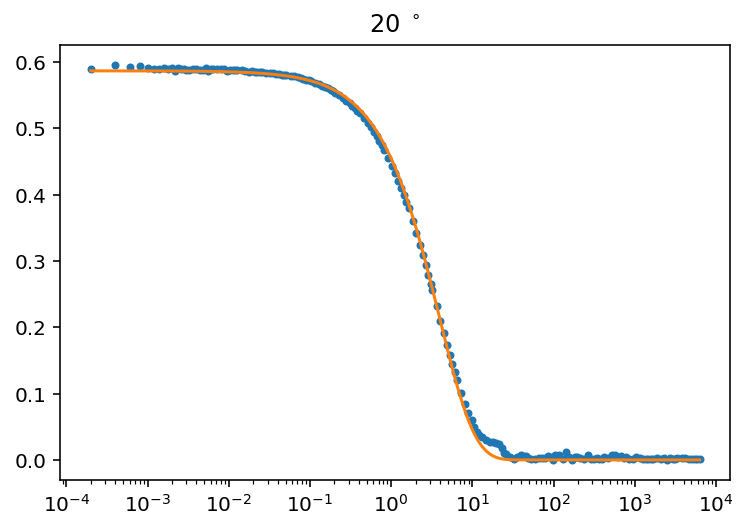

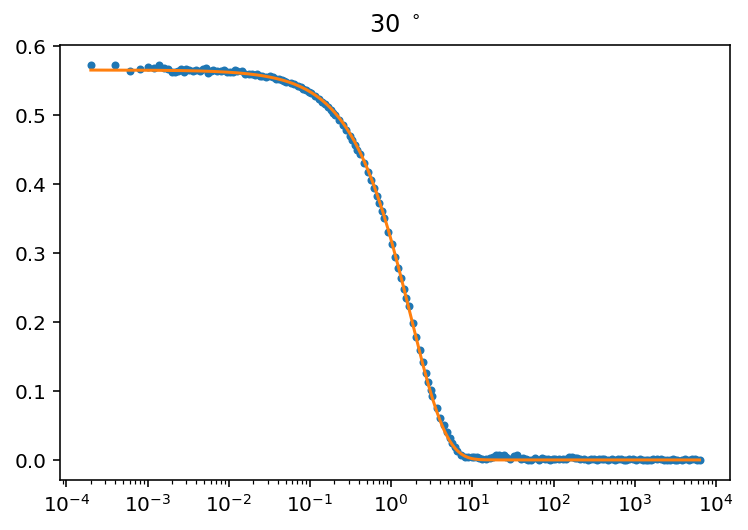

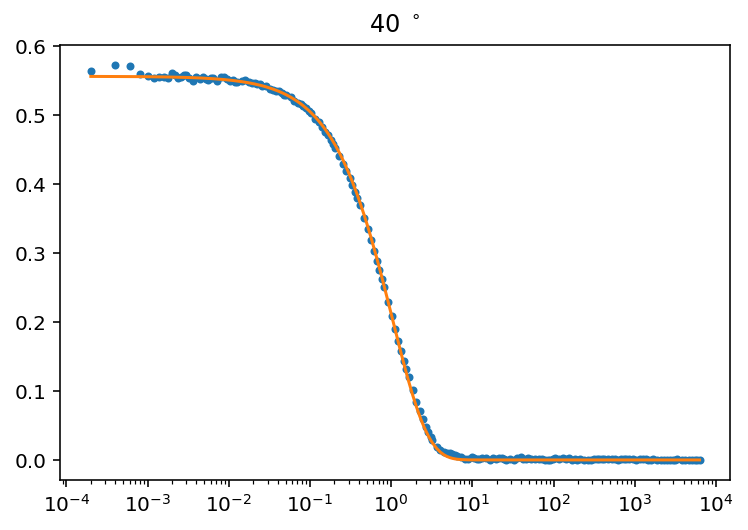

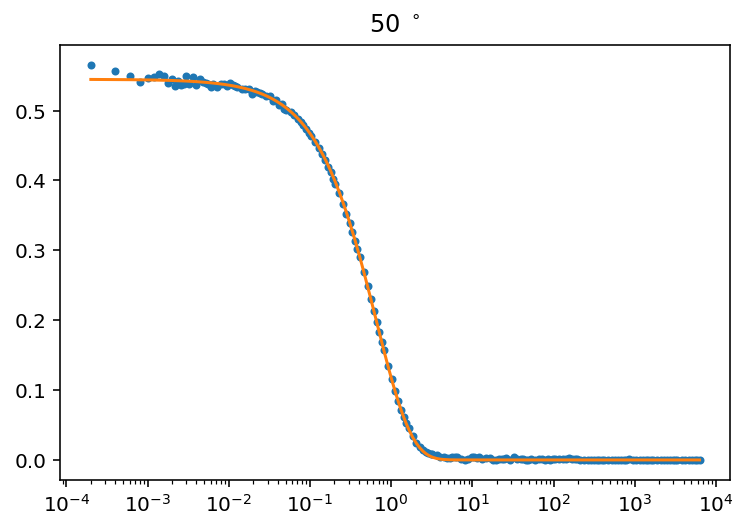

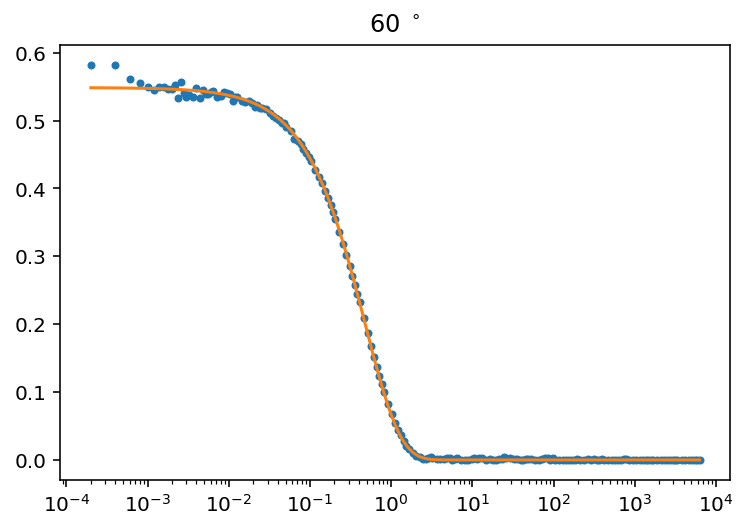

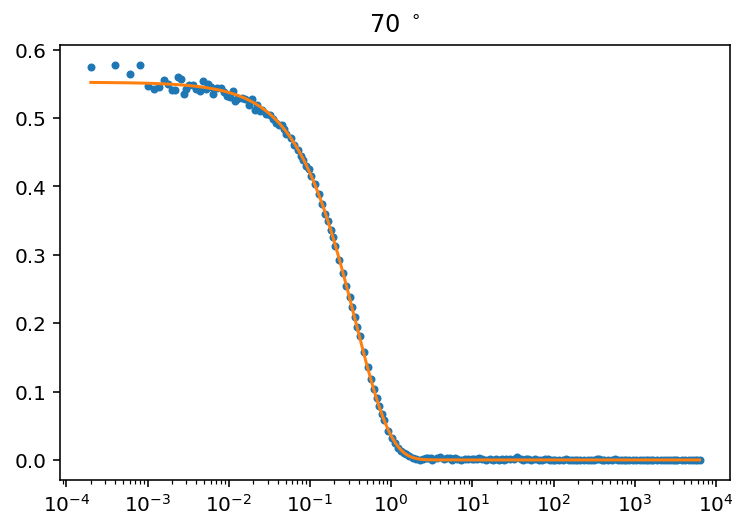

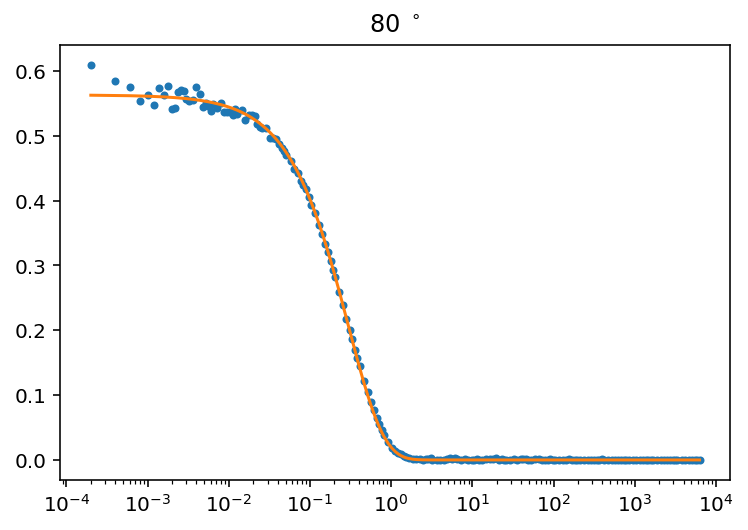

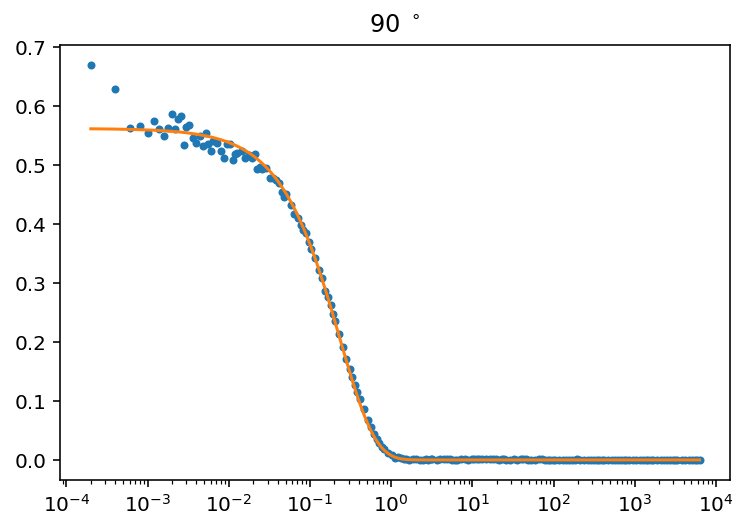

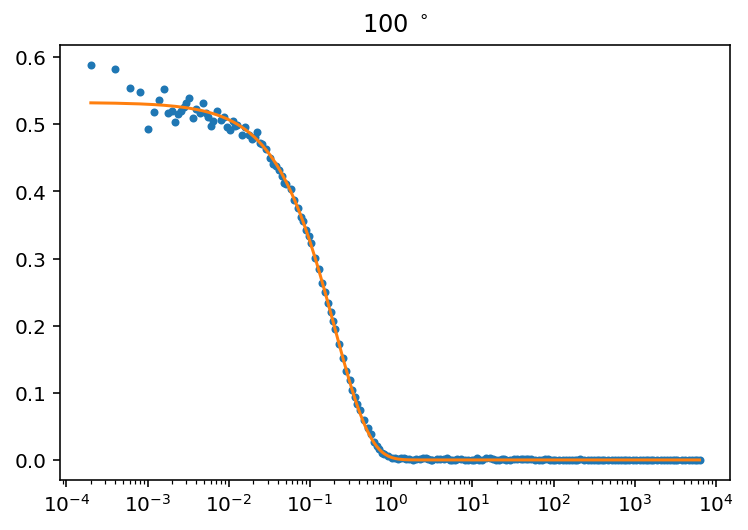

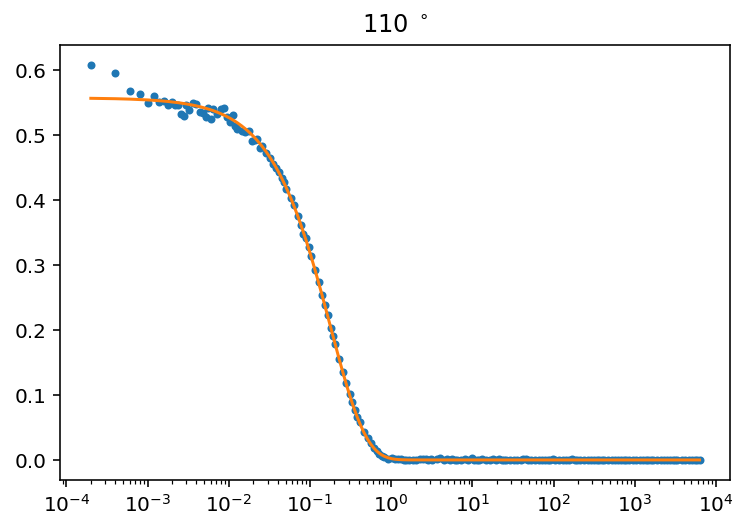

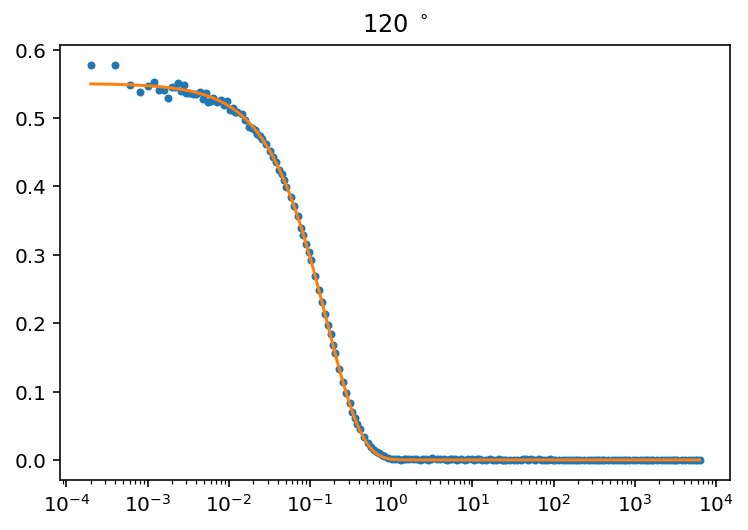

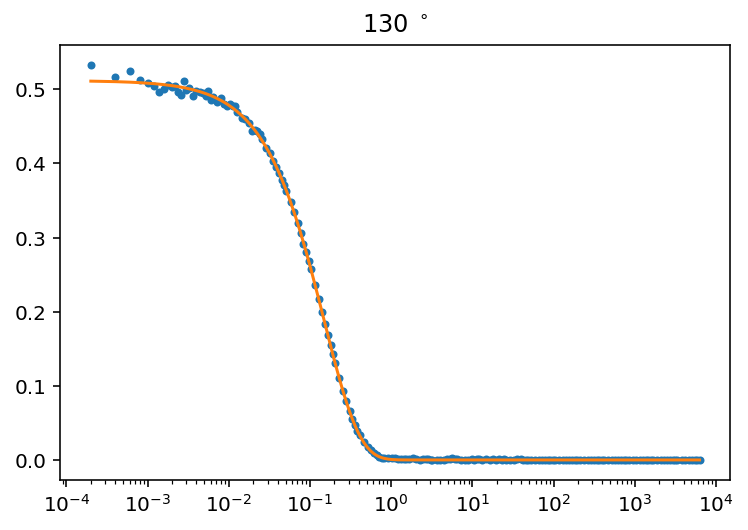

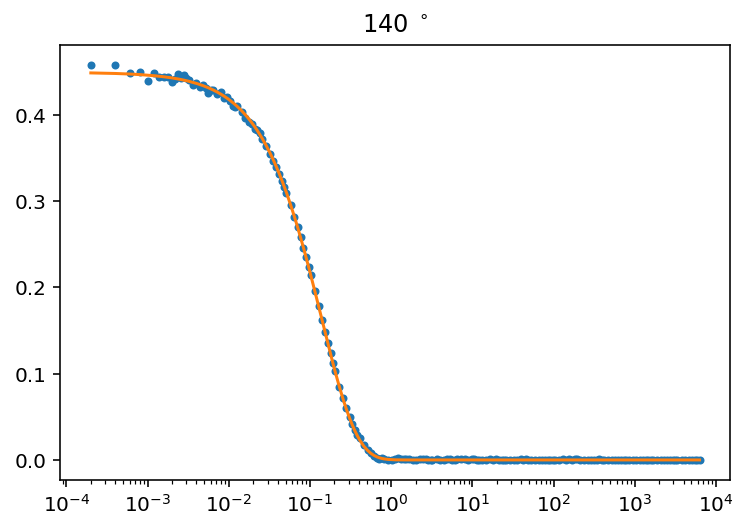

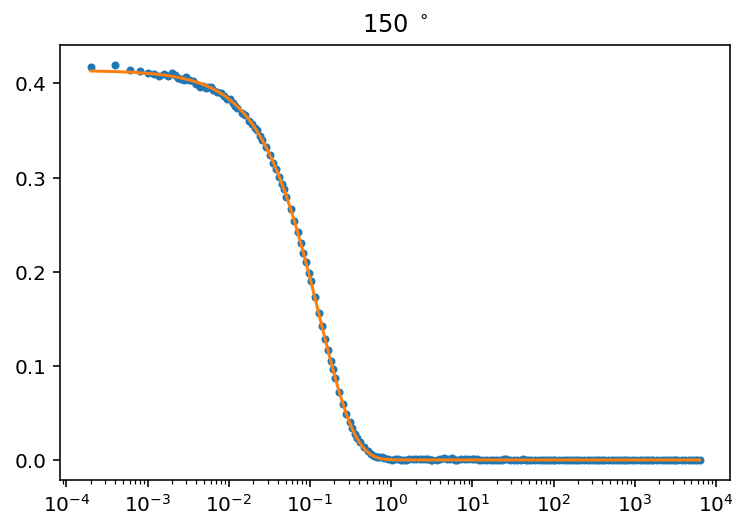

In [29]:
ax=0
#Viele Plots
namelist=[]
for x in range(2,16):
     namelist.append("Data/A/{}.ASC".format(x*10))
for x in range(len(namelist)):
    plotcorr(namelist[x],angels[x],ax)
#plotcorr(namelist[0],angels[0],ax)
#ax.legend()

In [ ]:
#B
def plotcorr(name,labels,ax):
    data=np.genfromtxt(name,skip_header=16,delimiter="\t",filling_values=-1,comments="\"")
    time=data[:183,0]
    corr=data[:183,1]
    q=calcq(labels)
    D=1
    #popt,pcov=sci.optimize.curve_fit(g,time,corr,p0=0)
    lin=np.linspace(0,time[182],1000)
    popt,pcov=sci.optimize.curve_fit(lambda time,D,C:g2(time,D,C,q),time,corr)
    print(popt)
    fig,ax=plt.subplots(dpi=144)

    ax.plot(time,(np.abs(corr)),".",label=r"{} $^\circ$".format(labels))
    ax.plot(time,g2(time,*popt,q))
    ax.semilogx()
    ax.set_title(r"{} $^\circ$".format(labels))
    fig.savefig("Plots/B/{}".format(labels))

In [ ]:
#Viele Plots B
namelist=[]
for x in range(2,16):
     namelist.append("Data/B/{}.ASC".format(x*10))
for x in range(len(namelist)):
    plotcorr(namelist[x],angels[x],ax)
#plotcorr(namelist[0],angels[0],ax)
ax.legend()